<a href="https://colab.research.google.com/github/vavvari/MAT421final/blob/main/finalproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

For any student, problems in core classes like math and language courses can have serious impacts on future student success due to the fundamental knowledge provided in such courses. In order to better understand and improve degrees of student achievement, we can model student performance along with other student characteristics to figure out which factors have the largest effect on overall student success. With this information, school professionals and teachers could make adjustments or corrections based on which students are predicted to struggle with coursework (Afkhaminia).

Data is sourced from students in Math and Portuguese courses from different schools in Portugal. This includes many different variables ranging all the way from family background, parental education, and health to more direct school factors in the life of the student such as time spent studying, extracurricular activities, and desire to pursue higher education amongst other factors. The most noteworthy characteristics to analyze are our dependent target variables of the first and second period (semester) grade as a composite average to determine the final grade for the entire school year. The final grade G3 could be influenced by a number of physical, family, and emotional health in negative ways - for example, students in poor emotional states have worse academic and performance and retention when compared to other students (Pritchard 19). Due to this family relationship, health, absences, and past failures will be looked at along with the more obvious study time characteristic.The goal for this project and the problem we are seeking a solution for is the question of how to identify the likelihood of success and failure for a given student based on certain numerical variables from our data set. Branching off from there, we also the opportunity to identify which characteristics are best to be looked at to determine whether or not a given student needs intervention from teachers or other professionals in order to increase the likelihood of their academic success.

Portugal, like some other European and South American countries, uses a 20-point grading scale with 20 corresponding to a perfect grade. Students are graded seperately for two consecutive semesters (G1 and G2 respectively) and their final grades are the average of the first and second semester, given as the variable G3 in the data and this project. Other numerical variables are measured on different numerical scales, explained below. Analysis will be conducted under the hypothesis that study time could be the strongest indicator of success, along with equal or greater indicators of family relationship, health, absences, and past failures.

ATTRIBUTE EXPLANATIONS

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)



**THEORY (MATH METHOD)**

The primary mathematical method used in this analysis is linear regression in order to generate a model for the relationship between variables, along with other supplemental techniques. The following listed methods and procedure was done for both the Math and Portuguese classes. To begin analysis we first read data from .csv files detailing both classes. The .head(), .info(), and .describe() pandas methods are used to learn more about our data, gaining further insights. To visualize the relationships being investigated we can then create jointplots for dependent variable G3 (final grade) and our variables of interest, with the variables being primarily study time, family relationship, health, past failures, and school absences. Pairplot for student data in both classes is used to examine the relationship between all variables at once. With judgements made from past plots, next we use heatmaps and linear model plots to confirm possible correlations relating to our hypothesis. These visualizations revealed the potential significance of study time, absences, and failures, to be further examined with a linear regression model. To train the linear regression model used, data structures for numerical variables of interest were set as X and Y for dependent G3 (final grade). Using this X and Y data, they can be split into training and testing sets in order to train our linear regression model, yielding model coefficients. Based of x test sets we can make predictions for Y (G3) and plot the tested values against predicted values. To evaluate model performance, the residual sum of squares was found and variance score calculated. To ensure an accurate model, a residual histogram was built to ensure a normal distribution of residuals. Finally, a table of coefficients was constructed to confirm the effects of significant independent variables.

**IMPLEMENTATION**

In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

urlmat = 'https://raw.githubusercontent.com/vavvari/MAT421final/main/student-mat.csv'
urlpor = 'https://raw.githubusercontent.com/vavvari/MAT421final/main/student-por.csv'

studentmat = pd.read_csv(urlmat)
studentpor = pd.read_csv(urlpor)

studentmat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [445]:
studentmat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [446]:
studentmat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [447]:
studentpor.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [448]:
studentpor.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [449]:
studentpor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

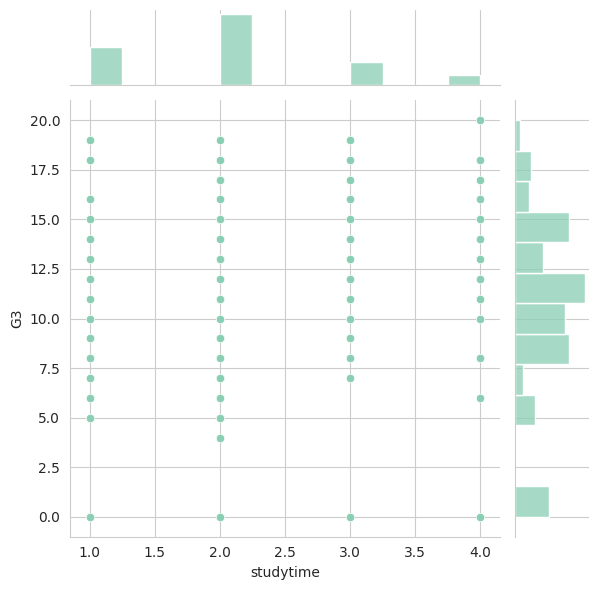

In [450]:
import seaborn as sns
sns.set_palette("BuGn_d")
sns.set_style('whitegrid')
sns.jointplot(x = 'studytime', y = 'G3', data = studentmat)

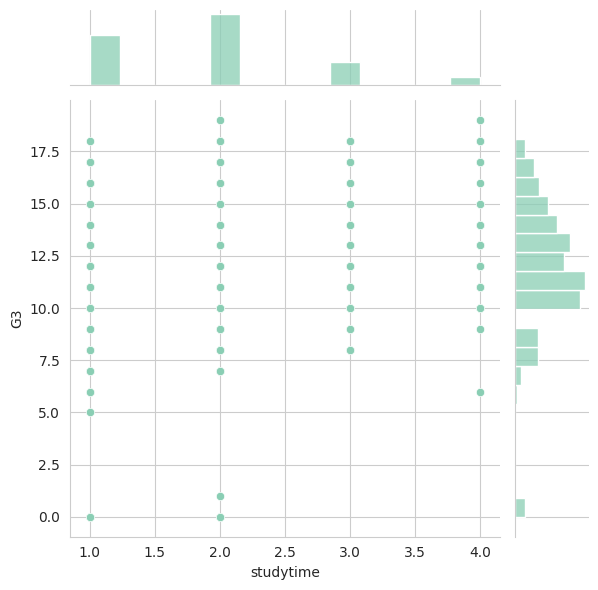

In [451]:
sns.jointplot(x = 'studytime', y = 'G3', data = studentpor)

Based on the plots, study time is suspected to have a weaker significance than expected for both subjects. We can also use the same method to compare final grade recieved to other notable variables in both classes like family relationship, student health, school absences, and past failures.

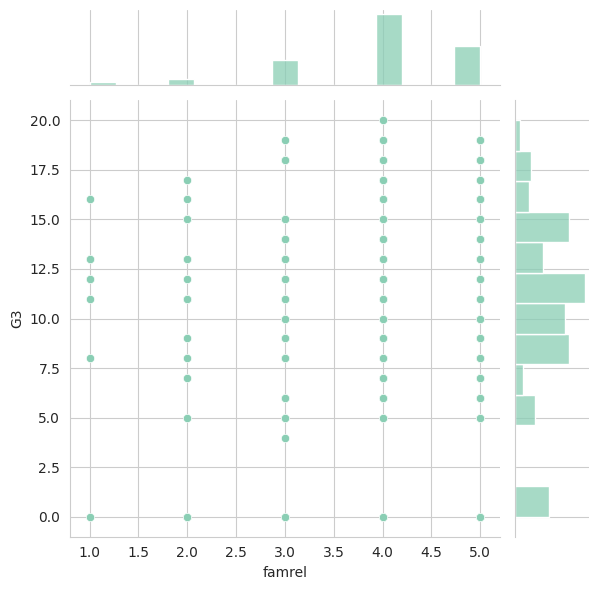

In [452]:
sns.jointplot(x = 'famrel', y = 'G3', data = studentmat)

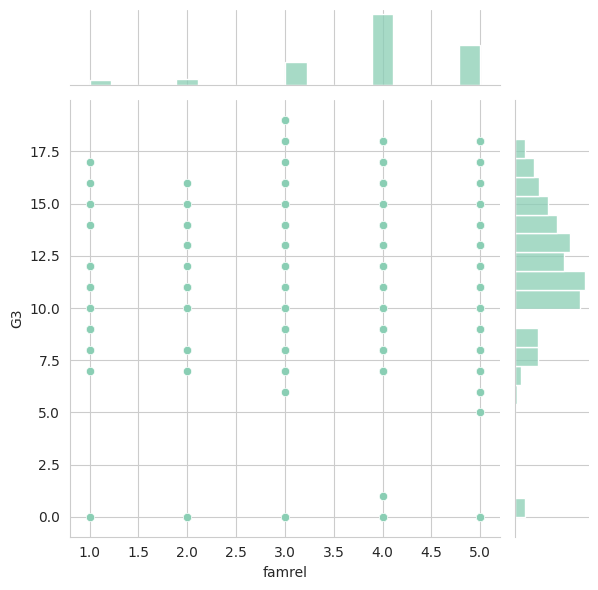

In [453]:
sns.jointplot(x = 'famrel', y = 'G3', data = studentpor)

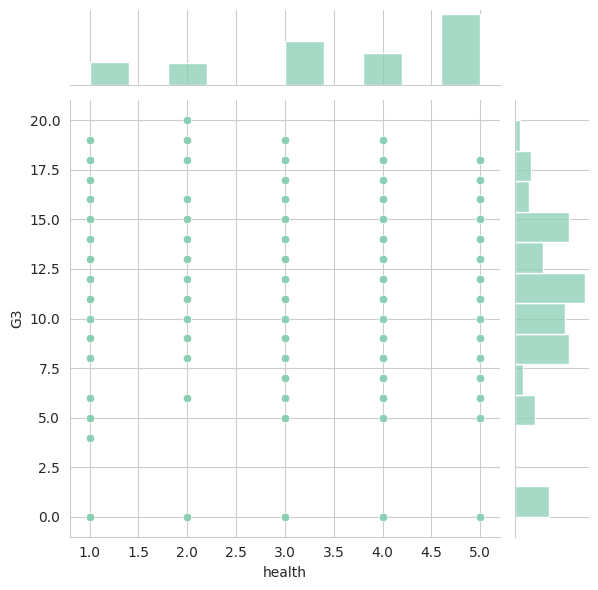

In [454]:
sns.jointplot(x = 'health', y = 'G3', data = studentmat)

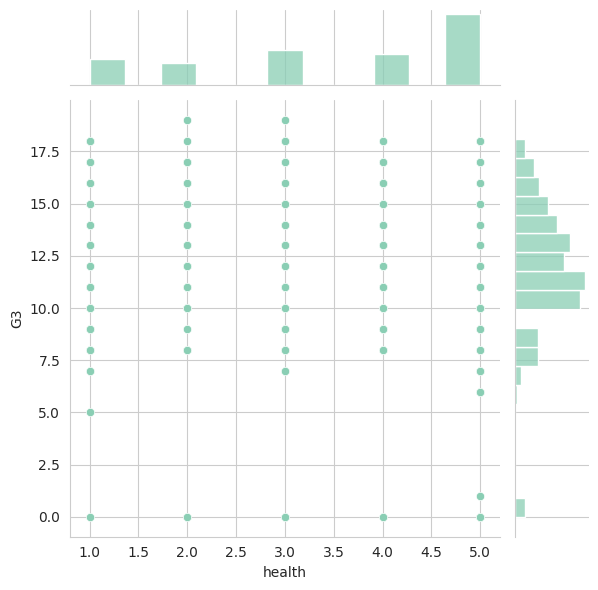

In [455]:
sns.jointplot(x = 'health', y = 'G3', data = studentpor)

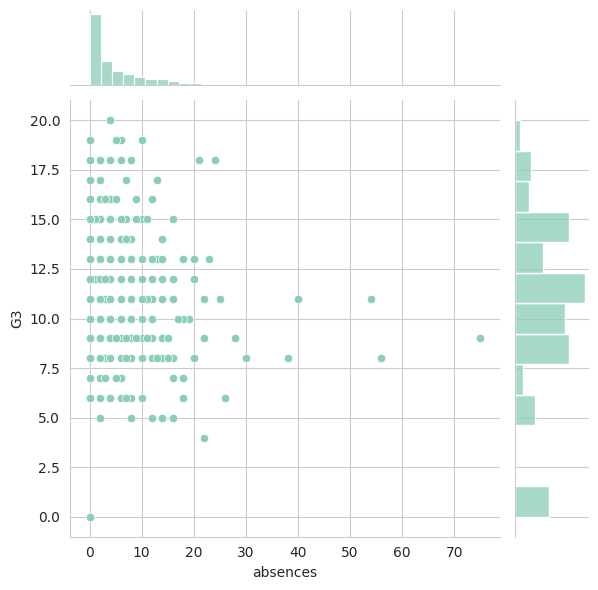

In [456]:
sns.jointplot(x = 'absences', y = 'G3', data = studentmat)

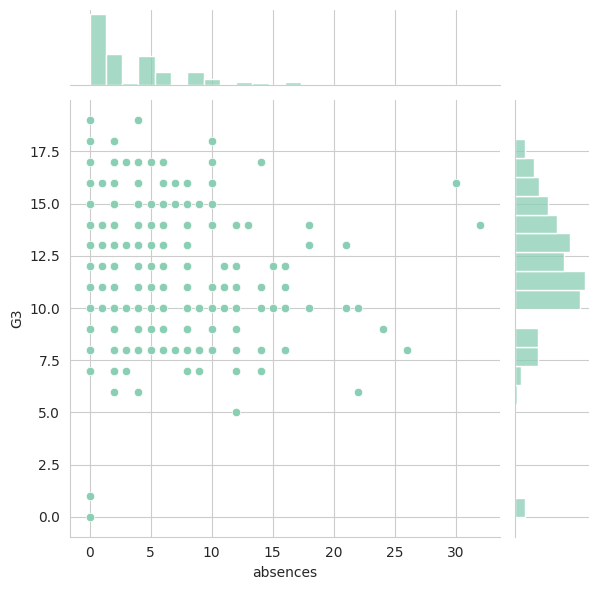

In [457]:
sns.jointplot(x = 'absences', y = 'G3', data = studentpor)

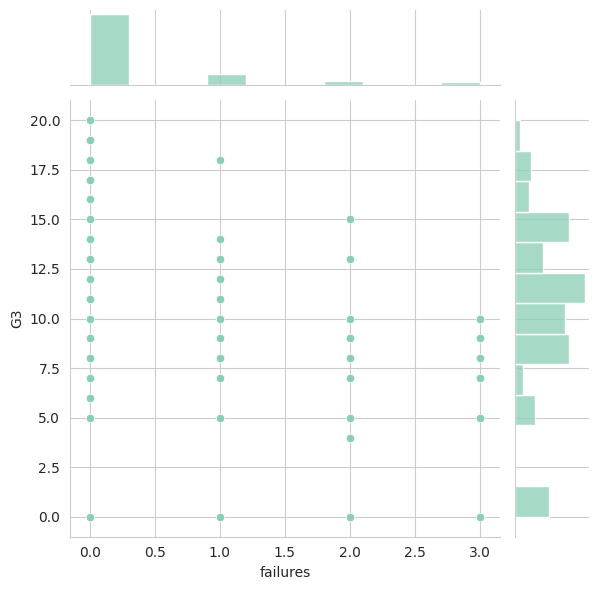

In [458]:
sns.jointplot(x = 'failures', y = 'G3', data = studentmat)

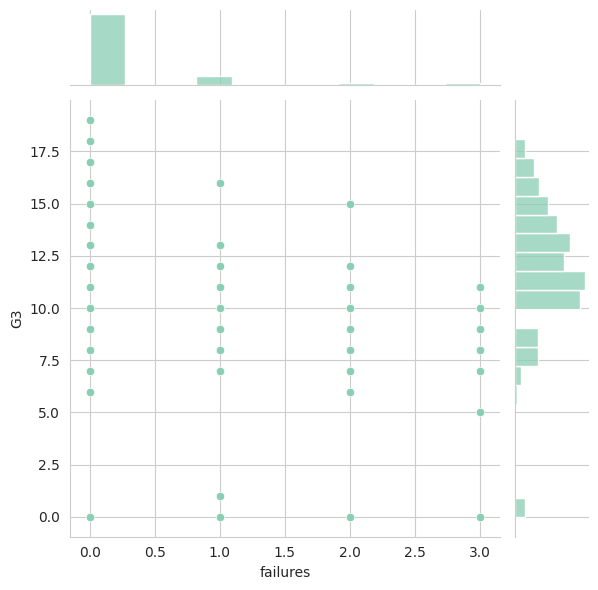

In [459]:
sns.jointplot(x = 'failures', y = 'G3', data = studentpor)

The joint plots show that failures seems to have the most signifcant negative correlation to student success, and a pair plot can be used to examine the relationship between all variables of interest including ones that appear to have little correlation like family relationsip.

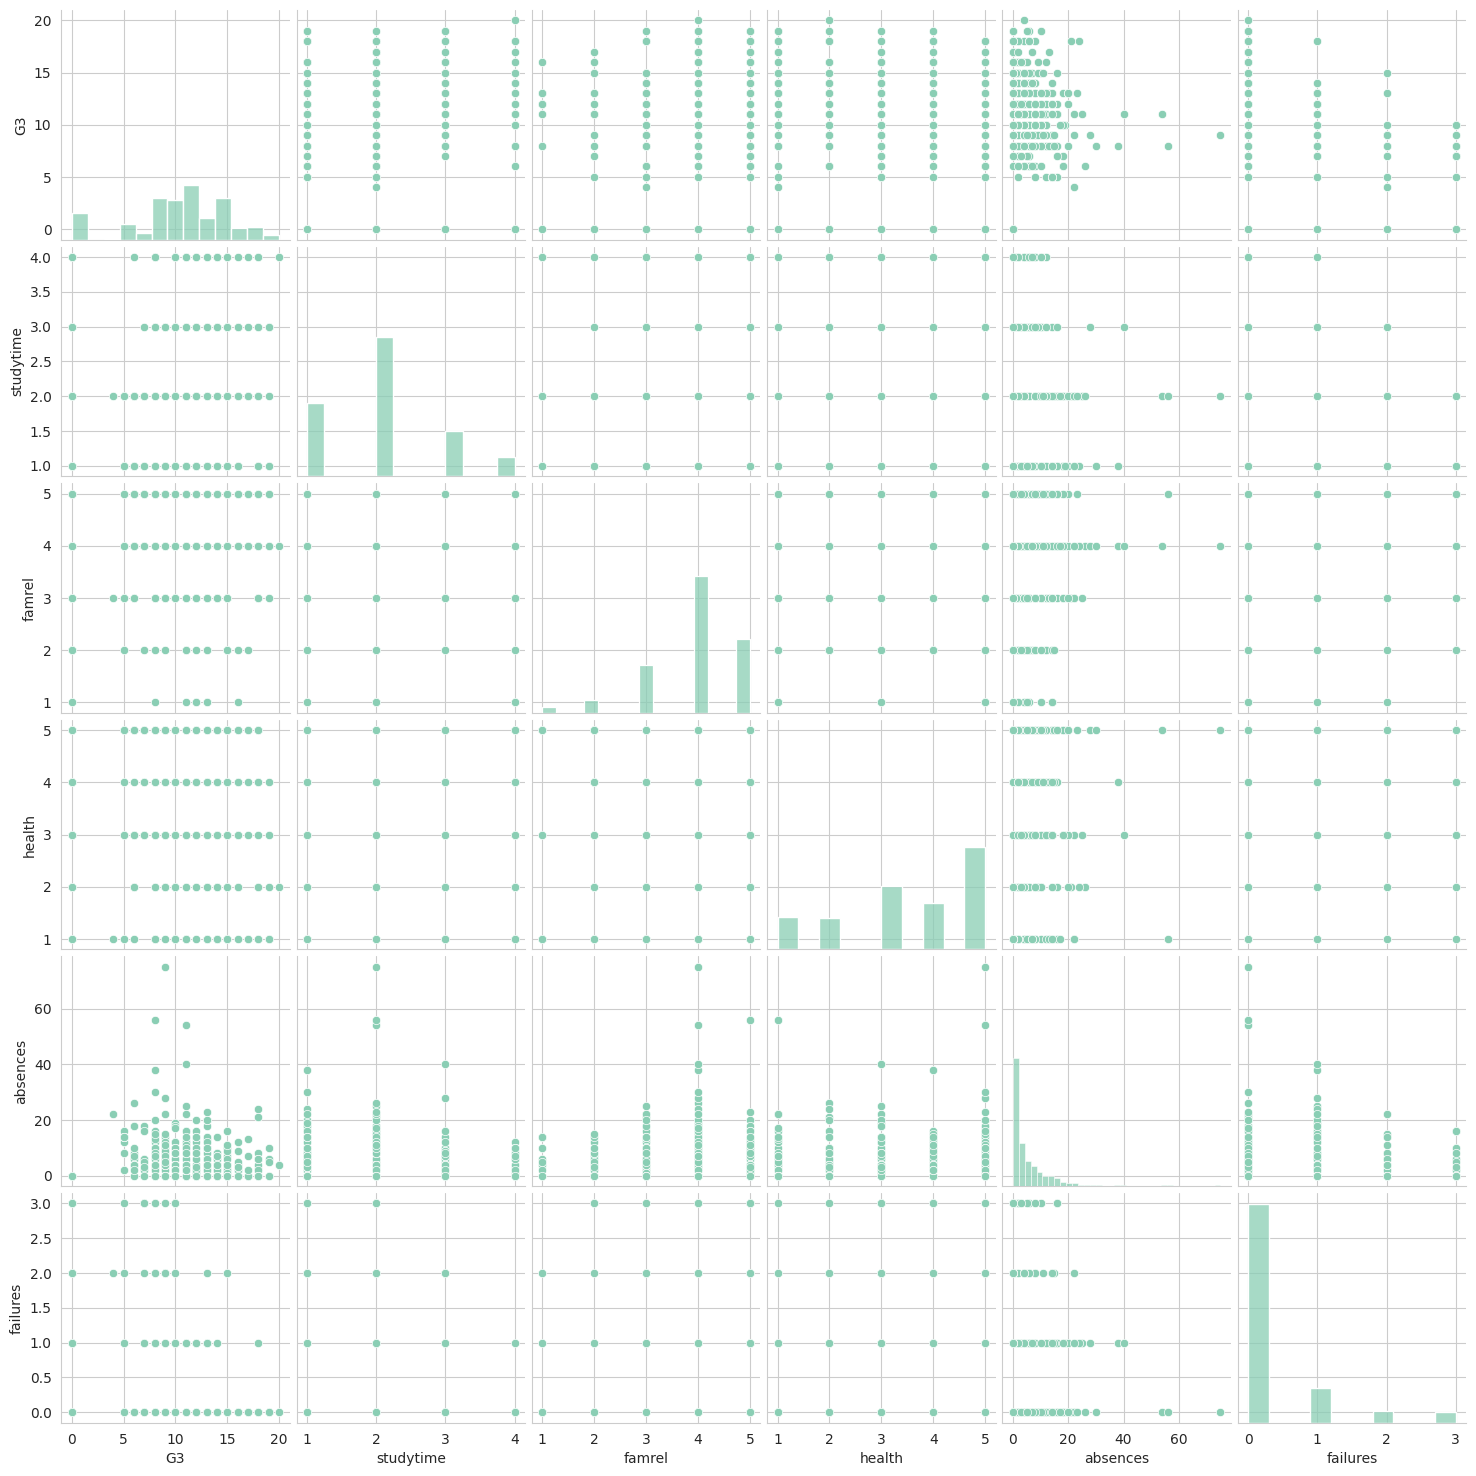

In [460]:
matpairplot = studentmat[['G3','studytime', 'famrel', 'health', 'absences','failures']]
sns.pairplot(matpairplot)

<Axes: >

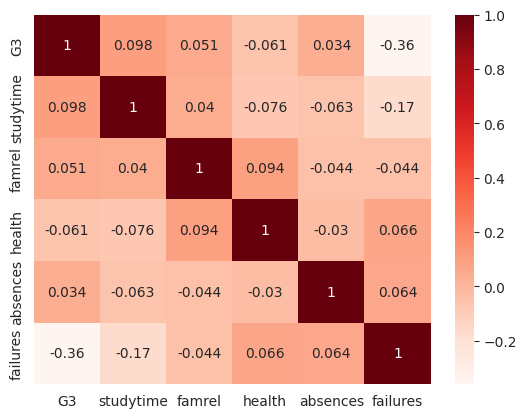

In [461]:
sns.heatmap(matpairplot.corr(), cmap="Reds", annot=True)

There is a negative correlation here as seen in the heat map between final grade and past failures in the data for Math students, and a weaker positive correlation than expected for study time.

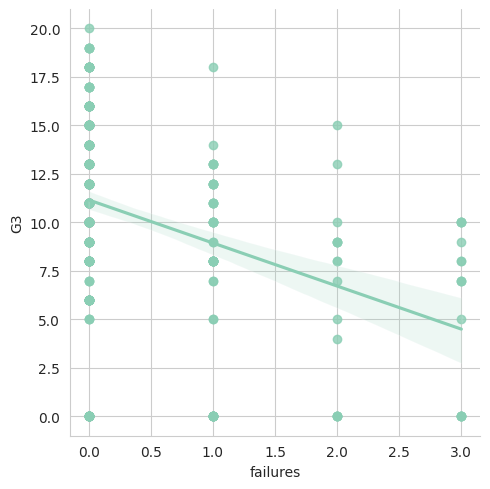

In [462]:
sns.lmplot(x = 'failures', y = 'G3', data = matpairplot)

The same procedure of using pair plot, a heatmap, and linear model plot is repeated for Portuguese subject data.

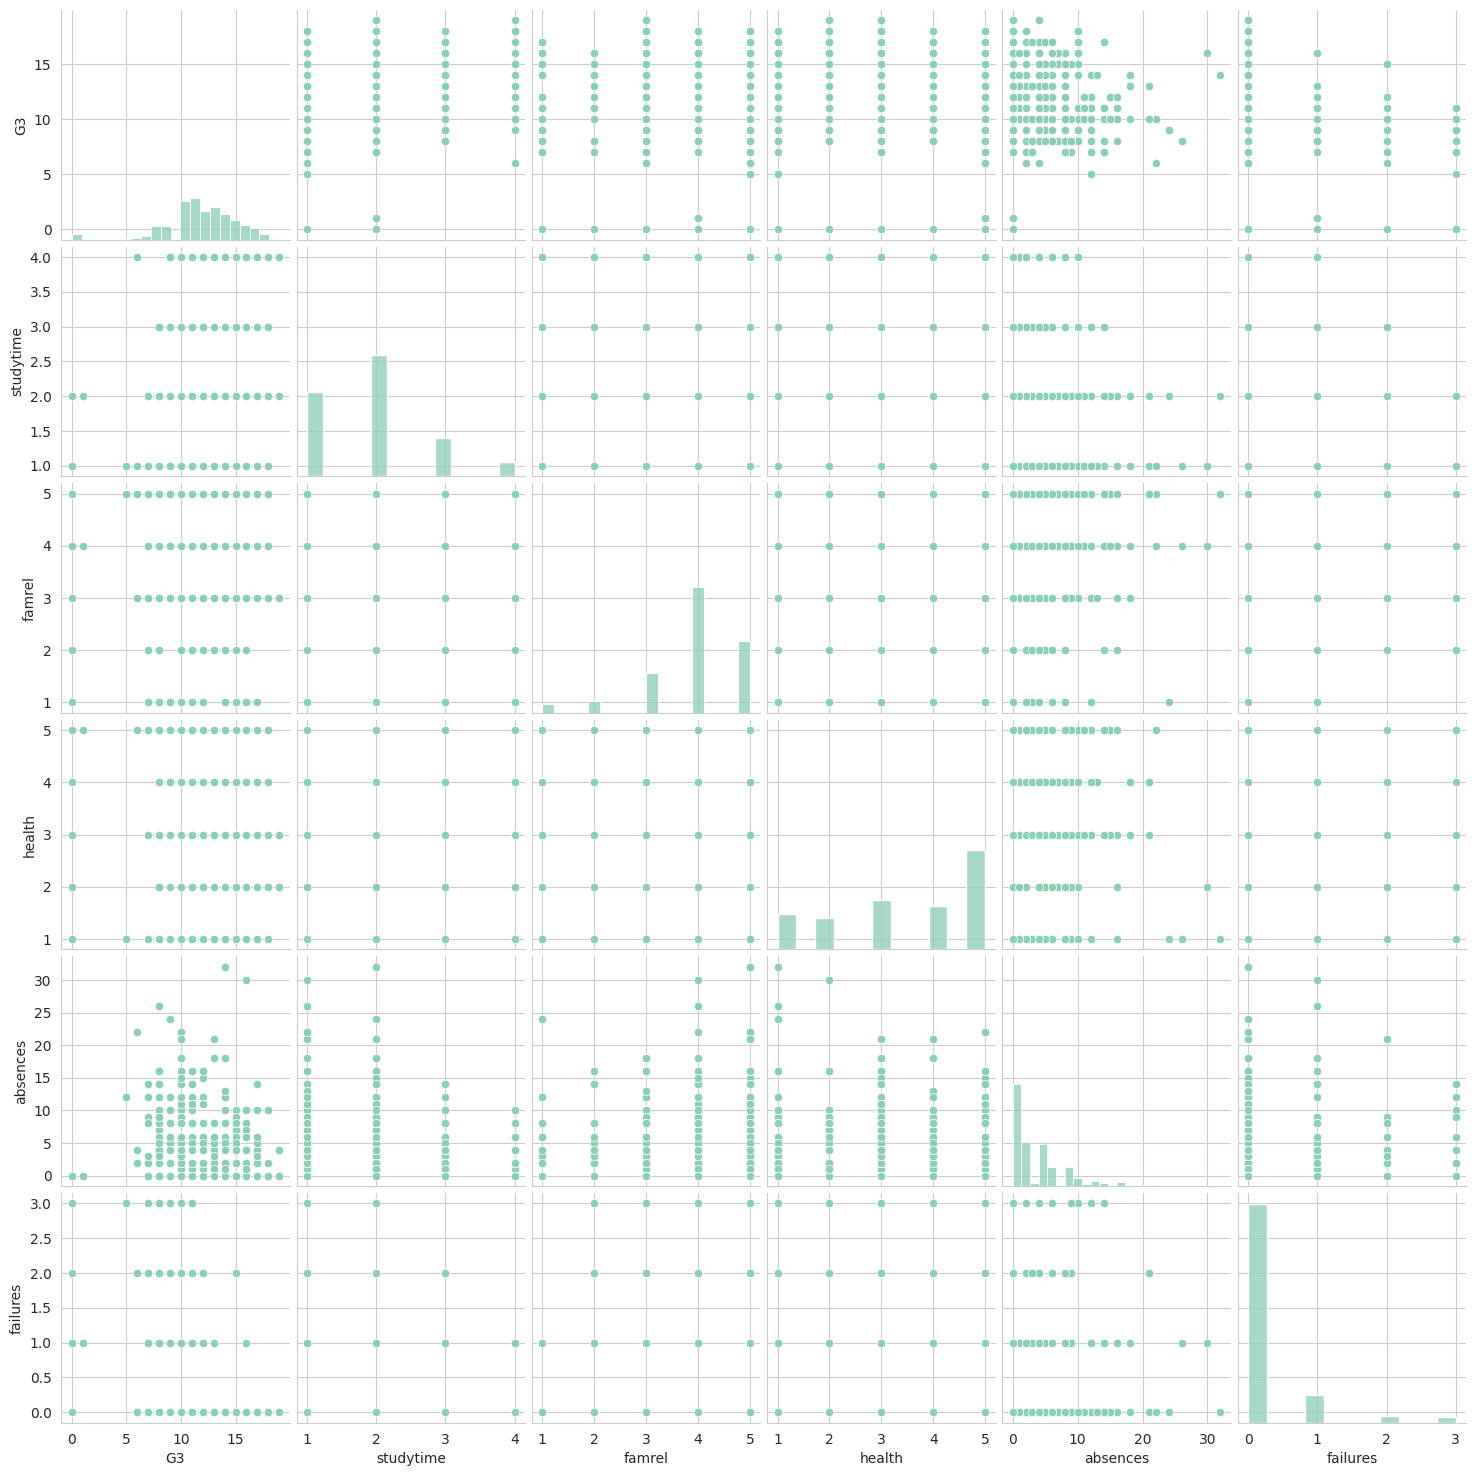

In [463]:
porpairplot = studentpor[['G3','studytime', 'famrel', 'health', 'absences','failures']]
sns.pairplot(porpairplot)

<Axes: >

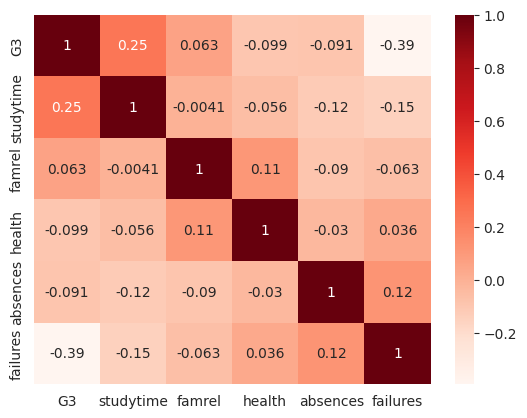

In [464]:
sns.heatmap(porpairplot.corr(), cmap="Reds", annot=True)

There is a negative correlation here as well between final grade and past failures for the Portuguese students. Study time has a stronger correlation here to G3 than the data for Math students.

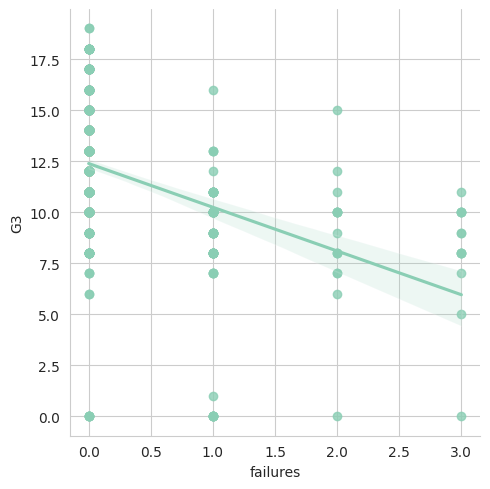

In [465]:
sns.lmplot(x = 'failures', y = 'G3', data = porpairplot)

In [466]:
X_var_mat = studentmat[['studytime', 'famrel', 'health', 'absences','failures']]
X_var_mat.head()

,studytime,famrel,health,absences,failures
0,2,4,3,6,0
1,2,5,3,4,0
2,2,4,3,10,3
3,3,3,5,2,0
4,2,4,5,4,0


In [467]:
Y_var_mat = studentmat[['G3']]
Y_var_mat.head()

,G3
0,6
1,6
2,10
3,15
4,10


Here we split math data into training and testing sets to construct our linear regression model, repeated later for the Portuguese student data. The coefficients generated are the coefficients of our regression model. Test and predicted values of Y are plotted to check model outputs.

Coefficients: 
 [[-0.0986721   0.14240968 -0.29918859  0.0346144  -2.60593898]]


Text(0, 0.5, 'Predicted Y')

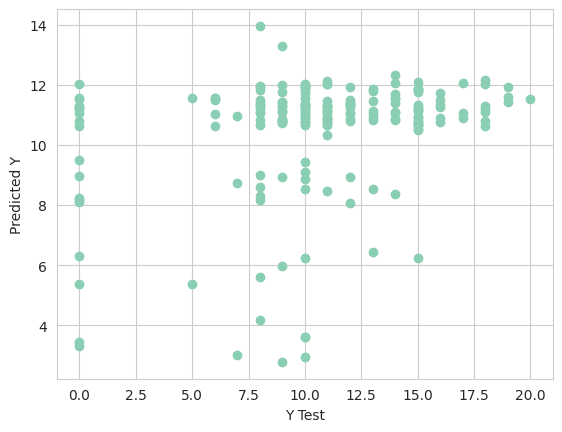

In [468]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X_var_mat, Y_var_mat, test_size=0.5, random_state=10)

lm = LinearRegression()
lm.fit(X_train,Y_train)
lm.coef_
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(X_test)
plt.scatter(x = Y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Calculation of residual sum of squares along with variance score so that we may see how well our model fits the data. The model appears to be accurately fit.

In [469]:
from sklearn import metrics
from math import sqrt

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 3.3894626603059232
Mean Squared Error: 19.59609137216503
Root Mean Squared Error: 4.42674726770854


<ipython-input-470-f4aabff24def>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions), bins = 100)


<Axes: ylabel='Density'>

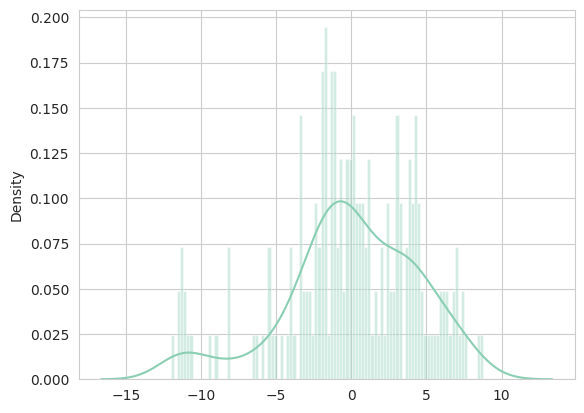

In [470]:
sns.distplot((Y_test-predictions), bins = 100)

The histogram of residuals appears to have a normal distribution, so the model is a good fit.

In [471]:
coeftable = pd.DataFrame(data = np.transpose(lm.coef_), columns = ['Coefficient'], index = X_train.columns)
coeftable.head()

,Coefficient
studytime,-0.098672
famrel,0.142410
health,-0.299189
absences,0.034614
failures,-2.605939


The coefficients of our linear regression model show that for the Math students past class failures are the biggest indicator of academic issues, with one unit of failure resulting in a 2.61 unit decrease in G3 or final grade. Health was the next biggest indicator of issues, but not nearly as significantly as past failures.

In [472]:
X_var_por = studentpor[['studytime', 'famrel', 'health', 'absences','failures']]
X_var_por.head()

,studytime,famrel,health,absences,failures
0,2,4,3,4,0
1,2,5,3,2,0
2,2,4,3,6,0
3,3,3,5,0,0
4,2,4,5,0,0


Coefficients: 
 [[ 0.50451532  0.05084047 -0.23676671 -0.06392196 -2.09575608]]


Text(0, 0.5, 'Predicted Y')

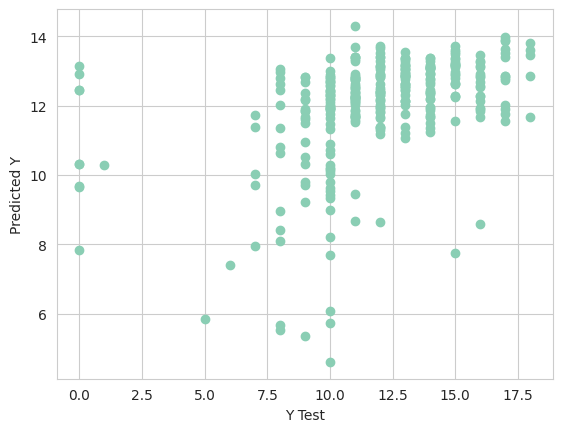

In [473]:
Y_var_por = studentpor[['G3']]
Y_var_por.head()

X_train, X_test, Y_train, Y_test = train_test_split(X_var_por, Y_var_por, test_size=0.5, random_state=10)

lm = LinearRegression()
lm.fit(X_train,Y_train)
lm.coef_
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(X_test)
plt.scatter(x = Y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Next is calculation of residual sum of squares along with variance score for the Portuguese class to again see how well our model fits the data.

In [474]:
from sklearn import metrics
from math import sqrt

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 2.1236713284341686
Mean Squared Error: 8.861842225593788
Root Mean Squared Error: 2.9768846510393696


<ipython-input-475-f4aabff24def>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions), bins = 100)


<Axes: ylabel='Density'>

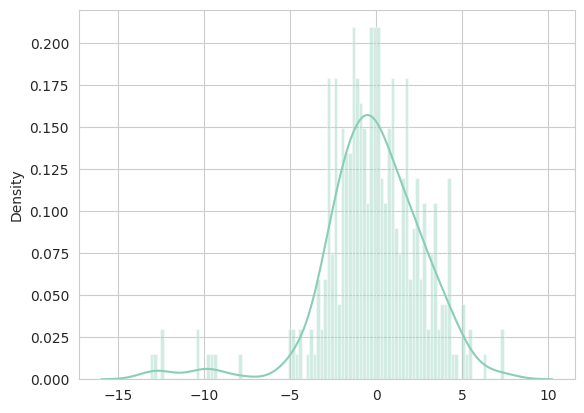

In [475]:
sns.distplot((Y_test-predictions), bins = 100)

Once again we see a normal distribution in the histogram of residuals, meaning this model is a good fit.

In [476]:
coeftable = pd.DataFrame(data = np.transpose(lm.coef_), columns = ['Coefficient'], index = X_train.columns)
coeftable.head()

,Coefficient
studytime,0.504515
famrel,0.050840
health,-0.236767
absences,-0.063922
failures,-2.095756


The coefficients reveal the same for the Portuguese class, with one unit of failure resulting in a 2.09 unit decrease in G3. Unlike the Math class however is the presence of study time as the next biggest indicator of student success. Past failures are the biggest predictor of academic difficulty, with health and study time being the next most impactful depending on subject.

**DATA**

Two different data sets were used in this project, with one providing information based on student performance in Mathematics and the other providing data based on grades received in the standard Portuguese language class. These two subjects were the subject of our analysis in this case as both subjects are considered to be fundamental knowledge that is instrumental to student success in other subjects (Cortez, Silva). There are specific aspects of the research topic that have not been previously explored that we will be paying closer attention to during this project, such as the impacts of our independent variables between different class subjects.

Data sets for both the Math and Portuguese student classes were originally sourced from:

https://archive.ics.uci.edu/dataset/320/student+performance\

EXAMINED ATTRIBUTES OF DATA EXPLAINED:

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

**CONCLUSION**

For both classes, our analysis of the data shows that past class failures are the variable with the strongest relation to final grades or G3, with an increase in past class failures being connected to a decrease in the final grade of a student. Study time was the variable with the next strongest effect for the Portuguese class students, although the correlation was interestingly not as high as past class failures. Interestingly, the Math student data yielded slightly different results, with student health being a strong indicator of student success. This insight can be used to predict academic struggles and intervene when necessary to improve academic success. It is important for teachers and other professionals to be able to recognize and locate students with a high probability of poor performance (students at risk) so that they may take precautions and be better prepared to face such cases of academic failure (Kotsiantis 412). In conclusion, we can gather from our analysis that a history of academic failures is the biggest indicator of future academic struggles for both math and language students, with study time and student health also being notable indicators for student success, albeit with slightly different values between classes confirming our initial hypothesis. Academic professionals should pay attention to student academic history, study habits, and student health to increase student success for both math and language classes.

**REFERENCES**

Afkhaminia, F., Siamian, H., Behnampour, N., Moghimi, A., & Karimpour, S. (2018). Study of Student Success Indicators based on the Viewpoints of the Students of Mazandaran University of Medical Sciences. Acta informatica medica : AIM : journal of the Society for Medical Informatics of Bosnia & Herzegovina : casopis Drustva za medicinsku informatiku BiH, 26(3), 175–179. https://doi.org/10.5455/aim.2018.26.175-179

Cortez, P., & Silva, A.M. (2008). Using data mining to predict secondary school student performance.

Kotsiantis, Sotiris & Pierrakeas, Christos & Pintelas, P.. (2004). PREDICTING STUDENTS'PERFORMANCE IN DISTANCE LEARNING USING MACHINE LEARNING TECHNIQUES. Applied Artificial Intelligence. 18. 411-426.

Pritchard, Mary & Wilson, Gregory. (2003). Using Emotional and Social Factors to Predict Student Success. Journal of College Student Development. 44. 18-28. 10.1353/csd.2003.0008.
